In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
# %matplotlib.style.use('ggplot') 
%matplotlib inline

In [2]:
# IMPORTS
df = pd.read_csv('../data/formula1.csv')

#taking data from 1991 onwards(no rhyme or reason just wanted to get enouph data to be able to model appropriately)
df = df[(df['year'] >= 1991)]
df = df.drop(labels = ['Unnamed: 0'], axis = 1)
# rename various columns
df.rename(columns={'constructorId': 'Team_Code'}, inplace=True)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
corrs = df.corr()[['rank']]
corrs['abs_corr']=abs(corrs['rank'])
corrs.sort_values('abs_corr', ascending=False).drop('abs_corr', axis=1).head(30)

,rank
rank,1.000000
year,0.654812
fastestLap,0.592409
dob,0.591915
position_y,0.577285
qualifyId,0.491383
resultId,0.441330
position,0.407292
constructorId_y,0.403997
driverId,0.367374


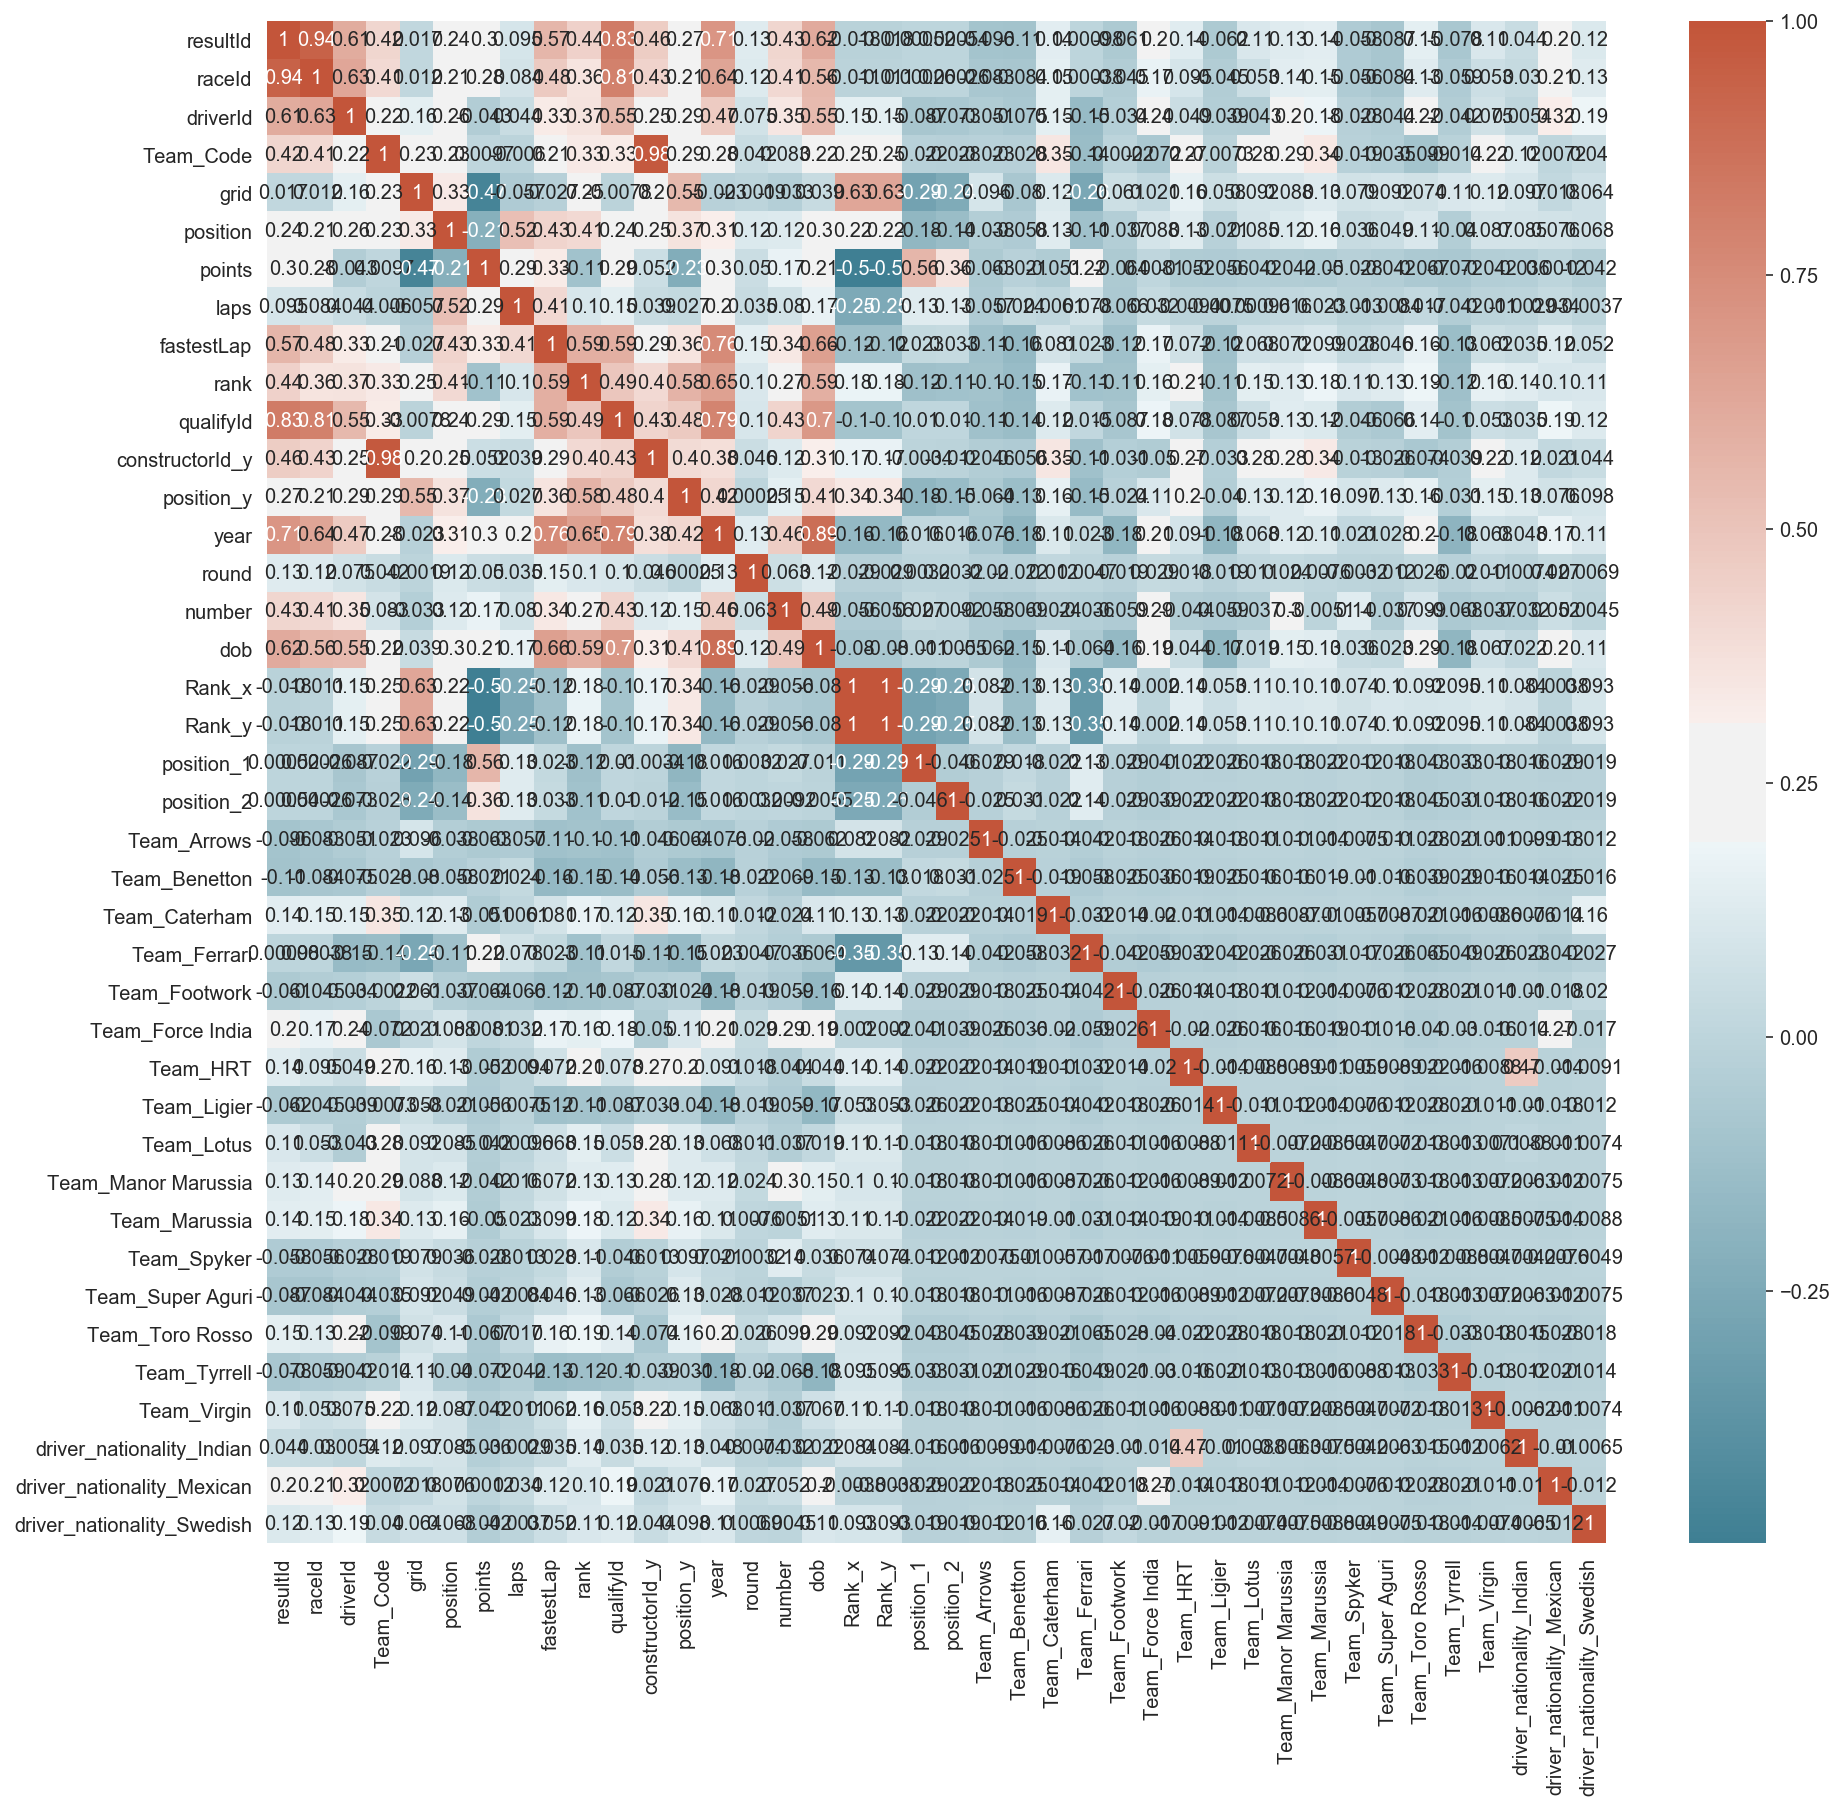

In [4]:
plt.figure(figsize=(15, 14))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df[list(corrs[corrs['abs_corr'] > .10].index)].corr(), annot=True, cmap=cmap);

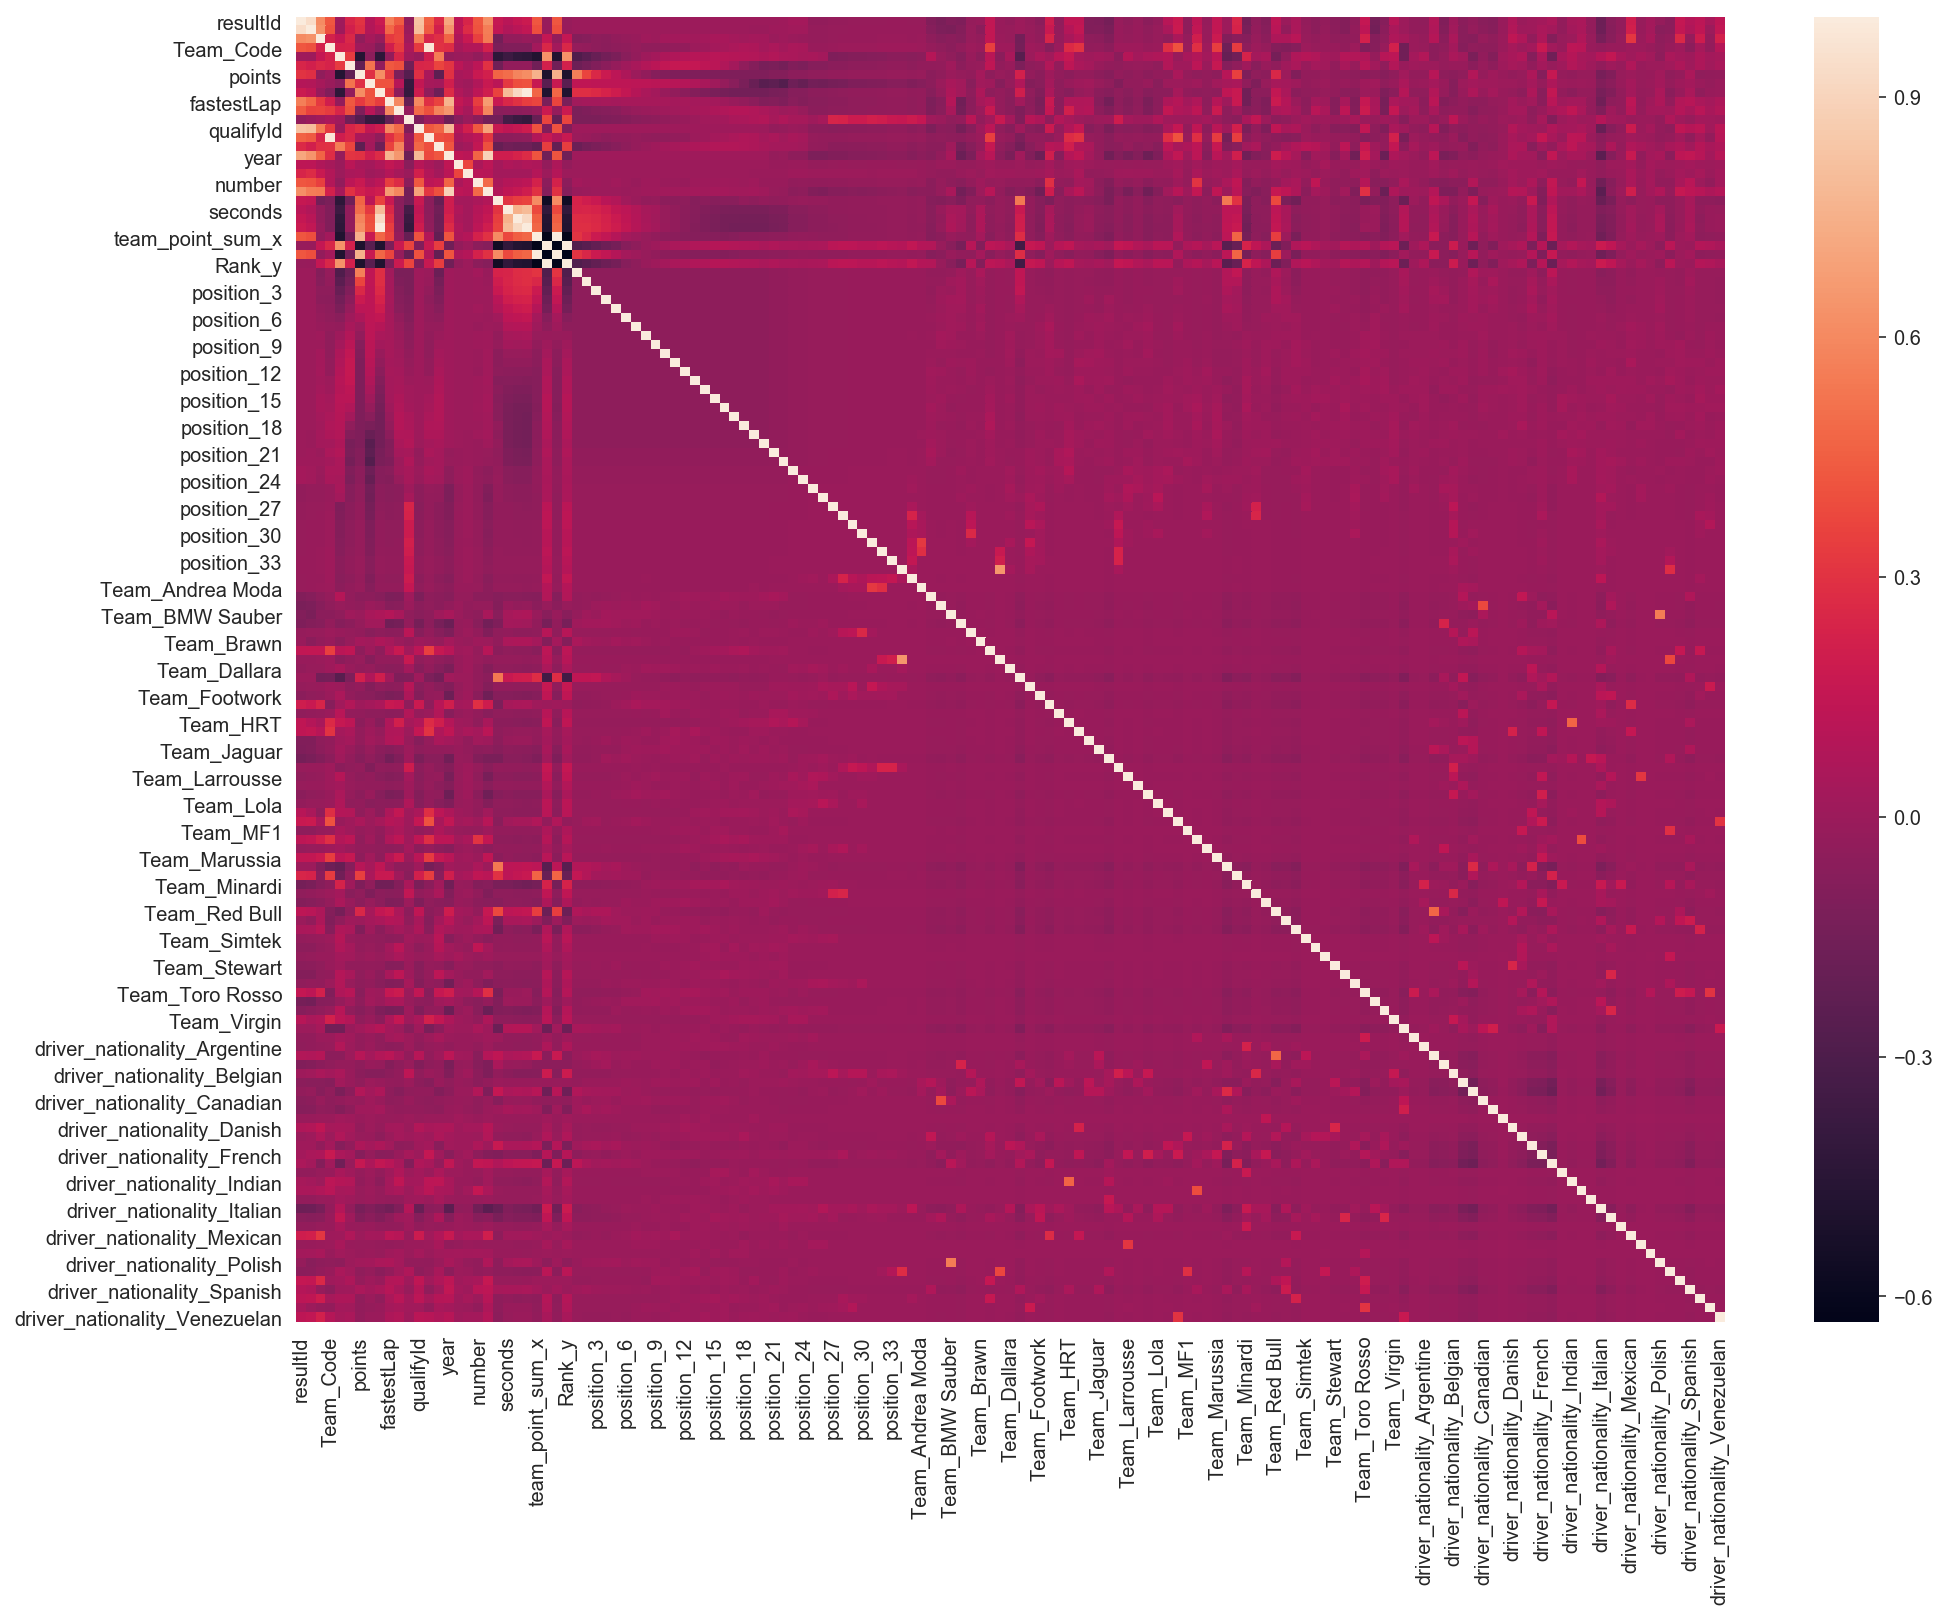

In [5]:
# creating a heatmap of features
plt.figure(figsize=(16,12))
sns.heatmap(df.corr())

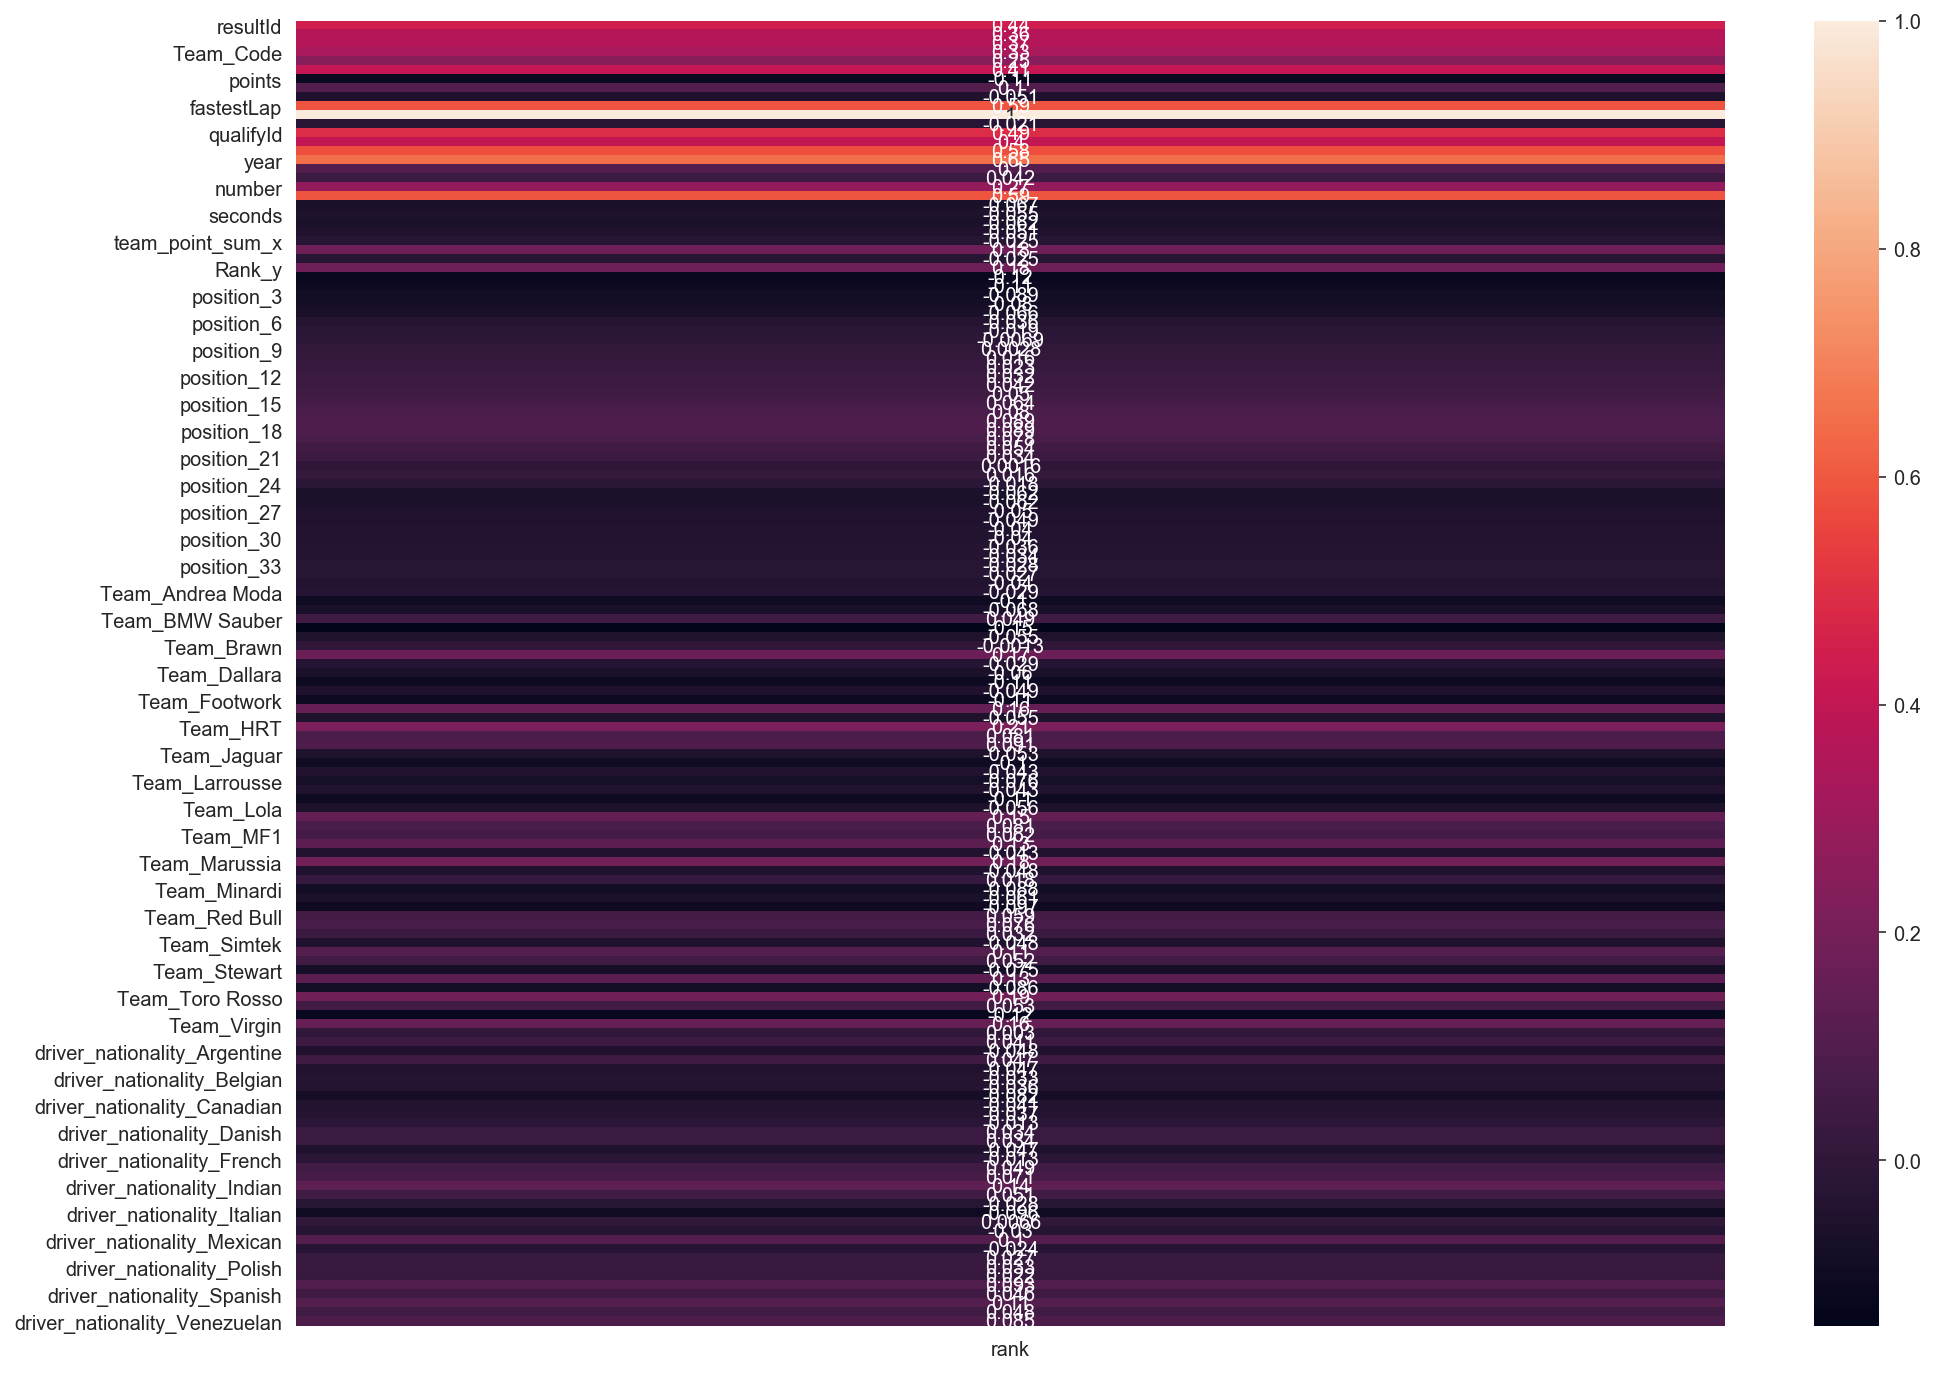

In [6]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr()[['rank']], annot = True,) ;

In [7]:
df.dtypes

resultId                              int64
raceId                                int64
driverId                              int64
Team_Code                             int64
grid                                  int64
position                            float64
points                              float64
laps                                  int64
milliseconds                        float64
fastestLap                          float64
rank                                float64
fastestLapTime                       object
fastestLapSpeed                      object
statusId                              int64
qualifyId                           float64
constructorId_y                     float64
position_y                          float64
q1                                   object
q2                                   object
q3                                   object
year                                  int64
round                                 int64
circuitId                       

In [8]:
#non numeric column names
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['resultId', 'raceId', 'driverId', 'Team_Code', 'grid', 'laps',
        'statusId', 'year', 'round', 'circuitId',
        ...
        'driver_nationality_Mexican', 'driver_nationality_Monegasque',
        'driver_nationality_New Zealander', 'driver_nationality_Polish',
        'driver_nationality_Portuguese', 'driver_nationality_Russian',
        'driver_nationality_Spanish', 'driver_nationality_Swedish',
        'driver_nationality_Swiss', 'driver_nationality_Venezuelan'],
       dtype='object', length=128),
 dtype('float64'): Index(['position', 'points', 'milliseconds', 'fastestLap', 'rank', 'qualifyId',
        'constructorId_y', 'position_y', 'number', 'Probability', 'seconds',
        'minutes', 'hours', 'team_point_sum_x', 'Rank_x', 'team_point_sum_y',
        'Rank_y'],
       dtype='object'),
 dtype('O'): Index(['fastestLapTime', 'fastestLapSpeed', 'q1', 'q2', 'q3',
        'grand_prix_name', 'date', 'driverRef', 'forename', 'surname',
        'constructo

In [9]:
df.to_csv('../data/Formula_1_.csv')